### A Review of High Impact factors on students' performance in PISA
#### by Oluwasola Aduewa

### Overview
- PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. 
- The survey examined how well students have learned the school curriculum and how well prepared they were for life beyond school in 2012. 
- Beginning from the variables selection to the exploratory phase of the analysis, the goal was to identify factors at home and in school that influences children's (15- 16 years) performance.


### Dataset
- The PISA dataset contains information on 485,490 students described with 636 variables. 
- The dataset has a wealth of information about the family, school, students' personality and many other information surrounding students in their end of compulsory education year. 
- The dataset can be found on [Udacity servers](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip&sa=D&ust=1581581520574000), and a detailed explanation of all its features can be obtained from this [spreadsheet](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisadict2012.csv&sa=D&ust=1554482573645000).


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import seaborn as sns

%matplotlib inline
# Set default plot styles
plt.style.use('default')

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('cleaned_sub_pisa.csv')

In [3]:
#cat=["AT","FT","ST","MT",]
cat=['MT','ST','FT','AT']
ordered=pd.api.types.CategoricalDtype(categories=cat, ordered=True)
df['truancy']=df.truancy.astype(ordered)

## Concentration:
***
Accroding to experts, students academic gain and learning performance is affected by numerous factor including gender, students schooling, father/guardian social economic status, medium of instructions in schools,etc. In this presentation They are summed under 3 factors which are
- Home Factor
- School Factor
- Student Motivation

NB: They are closely intertwined-effect of 

### Home/School
- Home support is good for children and it has a positive influence on their academic performance
- Study materials could be provided by parents or the government depending on the country
- Students succeed when they are equipped with the right study materials: literature, poetry, art, textbooks, technical textbooks, and dictionary
- The combined effect of home support and ownership of the 6 books types has a magical effect on the overall success of students.


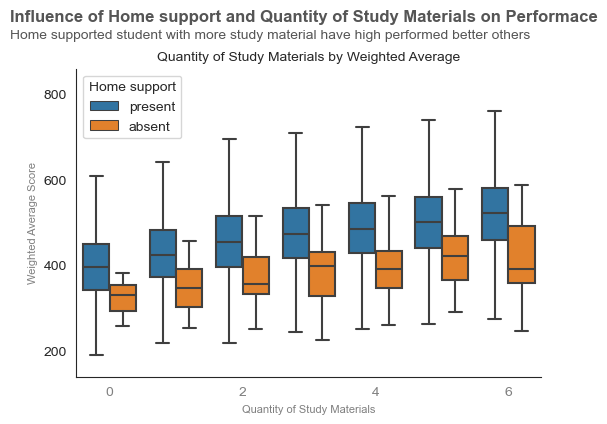

In [4]:
sns.set_style('white')
plt.figure(figsize=(6, 4))
sns.boxplot(data= df, x='num_study_material', y='weighted_avg', hue='home_support', fliersize=0,);
plt.xticks(np.arange(0,7,2),[0,2,4,6],color='grey')
plt.yticks(np.arange(200,1000,200),[200,400,600,800],)
plt.title("Quantity of Study Materials by Weighted Average",size=10)
plt.ylabel("Weighted Average Score",size=8,color='grey')
plt.xlabel("Quantity of Study Materials",size=8,color='grey')
plt.text(x=-1.5, y=970, s='Influence of Home support and Quantity of Study Materials on Performace', 
         fontsize=12, fontweight='bold', color='#555')
plt.text(x=-1.5, y=930, fontsize=10, color='#555',
         s="Home supported student with more study material have high performed better others")
sns.despine()
plt.legend(loc=0, title='Home support')
plt.show()

### Student Motivation
- About 80% of students made full attendance in school 
- The remaining 20% skipped classes at least once
- Students who are not regular in school are bound to underperform

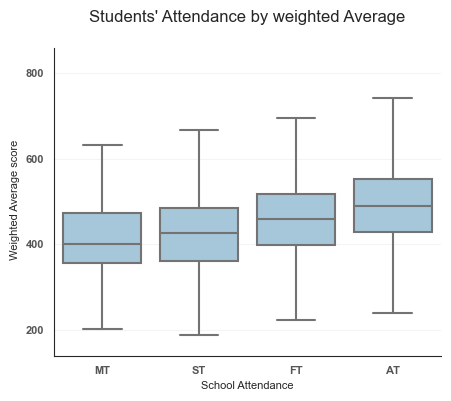

In [5]:
plt.figure(figsize=[5,4])
sns.boxplot(data=df,x='truancy',y='weighted_avg',fliersize=False,color=sns.color_palette('tab20c')[2]);
plt.xlabel("School Attendance",size=8)
plt.ylabel(" Weighted Average score",size=8)
plt.title("Students' Attendance by weighted Average\n" ,size=12)
sns.despine()
plt.grid(axis='y', alpha=0.2)
plt.xticks(color='#555', fontsize=8, fontweight='bold')
plt.yticks(np.arange(200,1000,200),[200,400,600,800],color='#555', fontsize=8, fontweight='bold')
# plt.title("School attendance by Weighted Average",size=15)
plt.show()

__Keys:__ _MT skip classes most of the time, ST skip classes some times, FT skip classes a few times, AT are regular in school_

### Notable features of the truants
- Understanding why truants behave how they behave is key to helping them
- Chronic truants compete highly in a class of students with no books and home support
- A few times truants are worse off compared to chronic truants in performance
- No conclusive evidence to show chronic truants underperform because they skipped classes 

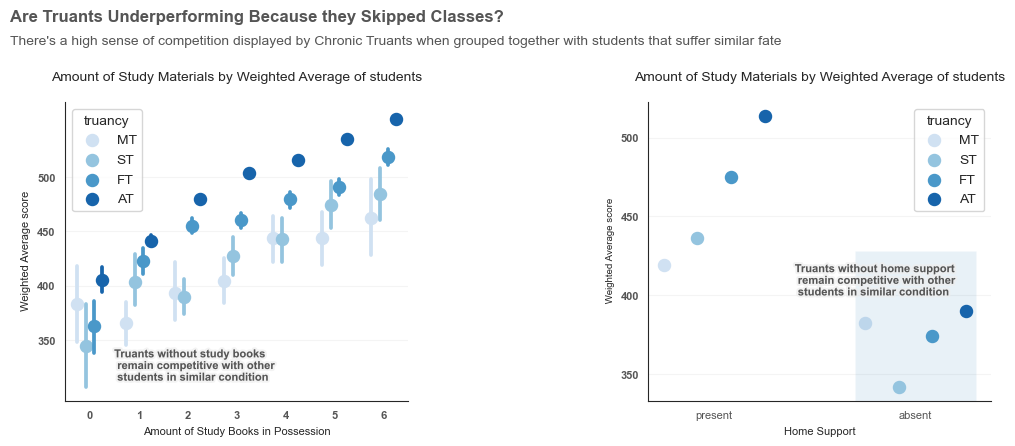

In [6]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
sns.pointplot(data=df,  x='num_study_material',y='weighted_avg', hue='truancy', linestyles='', dodge=0.5, palette='Blues',scale=1.1);
plt.xlabel("Amount of Study Books in Possession",size=8)
plt.ylabel(" Weighted Average score",size=8)
plt.title("Amount of Study Materials by Weighted Average of students\n" ,size=10)
sns.despine()
plt.grid(axis='y', alpha=0.2)
plt.xticks(color='#555', fontsize=8, fontweight='bold')
plt.yticks(np.arange(360,500,40),[350,400,450,500],color='#555', fontsize=8, fontweight='bold')
plt.text(x=0.5, y=330, fontsize=8, fontweight='bold', alpha=0.7,
         s="Truants without study books\n remain competitive with other\n students in similar condition",
         path_effects=[pe.withStroke(linewidth=3, foreground="#eee")])


plt.subplot(1,2,2)
sns.pointplot(data=df,  x='home_support',y='weighted_avg', hue='truancy', linestyles='', dodge=0.5, palette='Blues',capsize=0.015,ci=None,scale=1.1);
sns.despine()
plt.tight_layout()
plt.xlabel("Home Support",size=8)
plt.ylabel(" Weighted Average score",size=7)
plt.grid(axis='y', alpha=0.2)
plt.yticks(np.arange(360,500,40),[350,400,450,500],color='#555', fontsize=8, fontweight='bold')
plt.xticks(color='#555', fontsize=8)
plt.subplots_adjust(wspace=0.4, hspace=0);
plt.axvspan(xmin=0.7, xmax=1.3, alpha=0.1, ymax=0.5)
plt.text(x=.4, y=400, fontsize=8, fontweight='bold', alpha=0.7,
         s="Truants without home support\n remain competitive with other\n students in similar condition",
         path_effects=[pe.withStroke(linewidth=3, foreground="#eee")])
plt.title("Amount of Study Materials by Weighted Average of students\n" ,size=10)

# Set the Main title and subtitle for the entire figure

plt.text(x=-3.5, y=530, s='Are Truants Underperforming Because they Skipped Classes?\n', 
         fontsize=12, fontweight='bold', color='#555')
plt.text(x=-3.5, y=520, fontsize=10, color='#555',
         s="There's a high sense of competition displayed by Chronic Truants when grouped together with students that suffer similar fate\n")
plt.subplots_adjust(wspace=0.7, hspace=0);

plt.show()


### Final note: group work/ simulation
- Different students have different academic boost needs
- frequent group work is not a recipe that work all the time for all time
- Occassional group work seems to work best for all  students on average
- Simulation appears to be counter-productive at all levels
- However, Chronic truants benefit grately from frequent group work and simulation
- Contents of activities may need to be revisited and employ high degree of supervison 

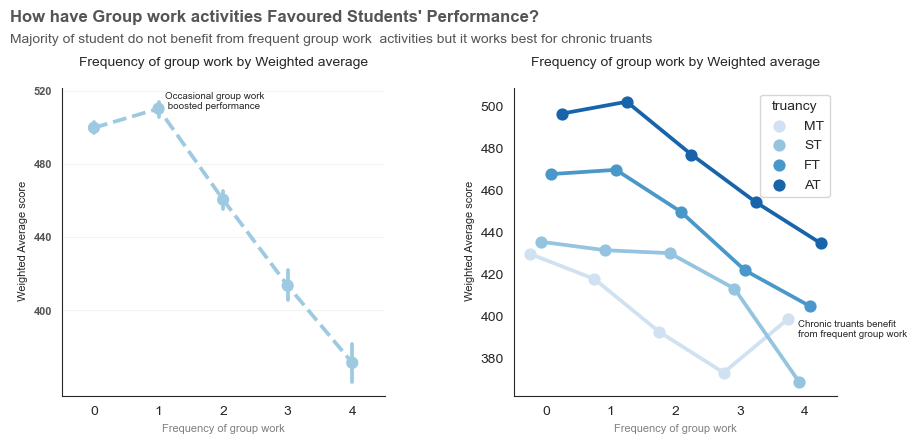

In [7]:
base=sns.color_palette('tab20c')[2]
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
sns.pointplot(data=df,x='group_work',y="weighted_avg",linestyles='--',color=base);
plt.yticks(np.arange(440,520,20),[400,440,480,520],color='#555', fontsize=8, fontweight='bold')
plt.xlabel("group work",size=8)
plt.ylabel(" Weighted Average score",size=8)
plt.xlabel("Frequency of group work",size=8, color='grey')
plt.title("Frequency of group work by Weighted average\n",size=10)
sns.despine(left=True)
plt.grid(axis='y', alpha=0.2)
plt.text(1.1,495,"Occasional group work\n boosted performance",size=7)



plt.subplot(1,2,2)
sns.pointplot(data=df,  x='group_work',y='weighted_avg', hue='truancy', linestyles='-', dodge=0.5, palette='Blues',ci=None);
plt.text(3.9,390,"Chronic truants benefit \nfrom frequent group work",size=7)
sns.despine()
plt.title("Frequency of group work by Weighted average\n",size=10)
plt.xlabel("Frequency of group work",size=8, color='grey')
plt.ylabel(" Weighted Average score",size=8)
# plt.yticks(np.arange(440,520,20),[400,440,460,480],color='#555', fontsize=8, fontweight='bold')

plt.text(x=-8.3, y=540, s='How have Group work activities Favoured Students\' Performance?', 
         fontsize=12, fontweight='bold', color='#555')
plt.text(x=-8.3, y=530, fontsize=10, color='#555',
         s="Majority of student do not benefit from frequent group work  activities but it works best for chronic truants")
plt.subplots_adjust(wspace=0.4, hspace=0);
plt.show()

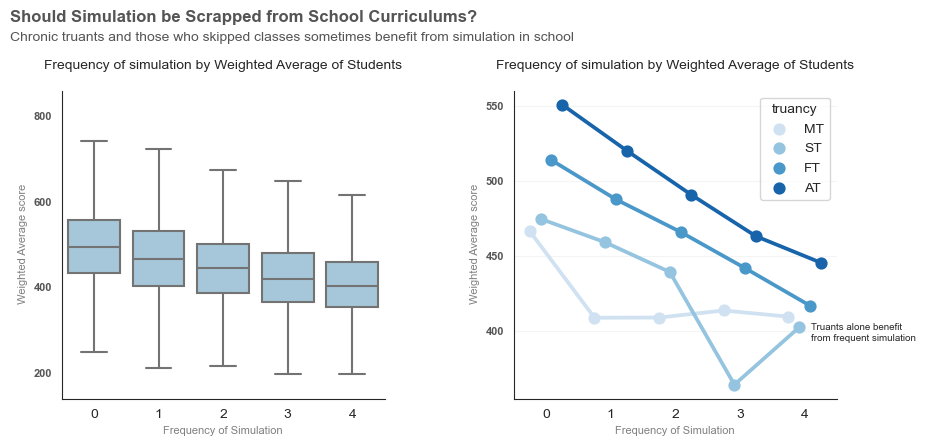

In [8]:

plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
sns.boxplot(data=df,x='schl_simulation',y='weighted_avg',color=base,fliersize=0);
plt.yticks(np.arange(200,900,200),[200,400,600,800],color='#555', fontsize=8, fontweight='bold')
plt.xlabel("Frequency of Simulation",size=8, color='grey')
plt.ylabel(" Weighted Average score",size=8, color='grey')
plt.title("Frequency of simulation by Weighted Average of Students\n",size=10)
sns.despine(left=True)



plt.subplot(1,2,2)
sns.pointplot(data=df,  x='schl_simulation',y='weighted_avg', hue='truancy', linestyles='-', dodge=0.5, palette='Blues',ci=None);
plt.text(4.1,375,"Truants alone benefit \nfrom frequent simulation",size=7)
plt.xlabel("Frequency of Simulation", color='grey',size=8)
plt.ylabel(" Weighted Average score",size=8, color='grey')
plt.title("Frequency of simulation by Weighted Average of Students\n",size=10)
plt.grid(axis='y', alpha=0.2)

plt.yticks(np.arange(380,520,40),[400,450,500,550],color='#555', fontsize=8, fontweight='bold')


plt.text(x=-8.3, y=545, s='Should Simulation be Scrapped from School Curriculums?', 
         fontsize=12, fontweight='bold', color='#555')
plt.text(x=-8.3, y=535, fontsize=10, color='#555',
         s="Chronic truants and those who skipped classes sometimes benefit from simulation in school")

plt.subplots_adjust(wspace=0.4, hspace=0);
sns.despine()


In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 